# Lesson 3 Assignment: Retrying some Regression

In the lesson, you used a subset of the pumpkin data. Now, go back to the original data and try to use all of it, cleaned and standardized, to build a Logistic Regression model

## Cleaning the Pumpkin Data

First, we clean the data a bit, and dropping null values.
  Let's load the data first:

In [4]:
import pandas as pd
pumpkins = pd.read_csv('data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


### Selecting features, Droppin null values and Label encoding

Let's check if there are null values so as to drop them:


In [2]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

We can then filter all those columns that have too many null values:

But first, we need to pick the desired categorical features and label encode them:

In [5]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package', 'Date','Repack']
new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

We can then add the low price and high price columns into the DataFrame:

In [6]:
new_pumpkins['Low_Pr'ice]=pumpkins['Low Price']
new_pumpkins['High_Price']=pumpkins['High Price']

In [7]:
new_pumpkins.head()

,City Name,Package,Variety,Date,Origin,Item Size,Color,Repack,Low_Price,High_Price
0,1,5,10,27,8,2,3,0,270.0,280.0
1,1,5,10,32,8,2,3,0,270.0,280.0
2,1,5,4,49,4,3,0,1,160.0,160.0
3,1,5,4,49,22,3,0,1,160.0,160.0
4,1,5,4,13,8,2,0,1,90.0,100.0


Now that we have all the undesirable data filtered, we can drop nulls:

In [7]:
new_pumpkins.dropna(inplace=True)

### Normalizing the data

The values in the DataFrame are not all of thesame scale. To have a better model, we need to normalize it using the sklearn scaler:

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the dataframe
normalized_data = scaler.fit_transform(new_pumpkins)

After normalization, the data is now converted to numpy array. Let's convert it to a DataFrame:

In [9]:
normalized_new_pumpkins = pd.DataFrame(normalized_data, columns=new_pumpkins.columns)

In [10]:
normalized_new_pumpkins.head()

,City Name,Package,Variety,Date,Origin,Item Size,Color,Repack,Low_Price,High_Price
0,-1.095746,-0.154668,1.615632,0.167092,-0.485341,-1.099365,1.215278,-18.718974,1.734335,1.642792
1,-1.095746,-0.154668,1.615632,0.405466,-0.485341,-1.099365,1.215278,-18.718974,1.734335,1.642792
2,-1.095746,-0.154668,-0.633707,1.215935,-1.100485,-0.583588,-0.930695,0.053422,0.422511,0.302002
3,-1.095746,-0.154668,-0.633707,1.215935,1.667664,-0.583588,-0.930695,0.053422,0.422511,0.302002
4,-1.095746,-0.154668,-0.633707,-0.500354,-0.485341,-1.099365,-0.930695,0.053422,-0.412286,-0.368393


## Visualizing side-by-side

Let's visualize the dataframe using a library called Seaborn, which is built on Matplotlib.

Seaborn offers some neat ways to visualize your data. For example, you can compare distributions of the data for each point in a side-by-side grid.

Create such a grid by instantiating a PairGrid, using our pumpkin data new_pumpkins, followed by calling map():

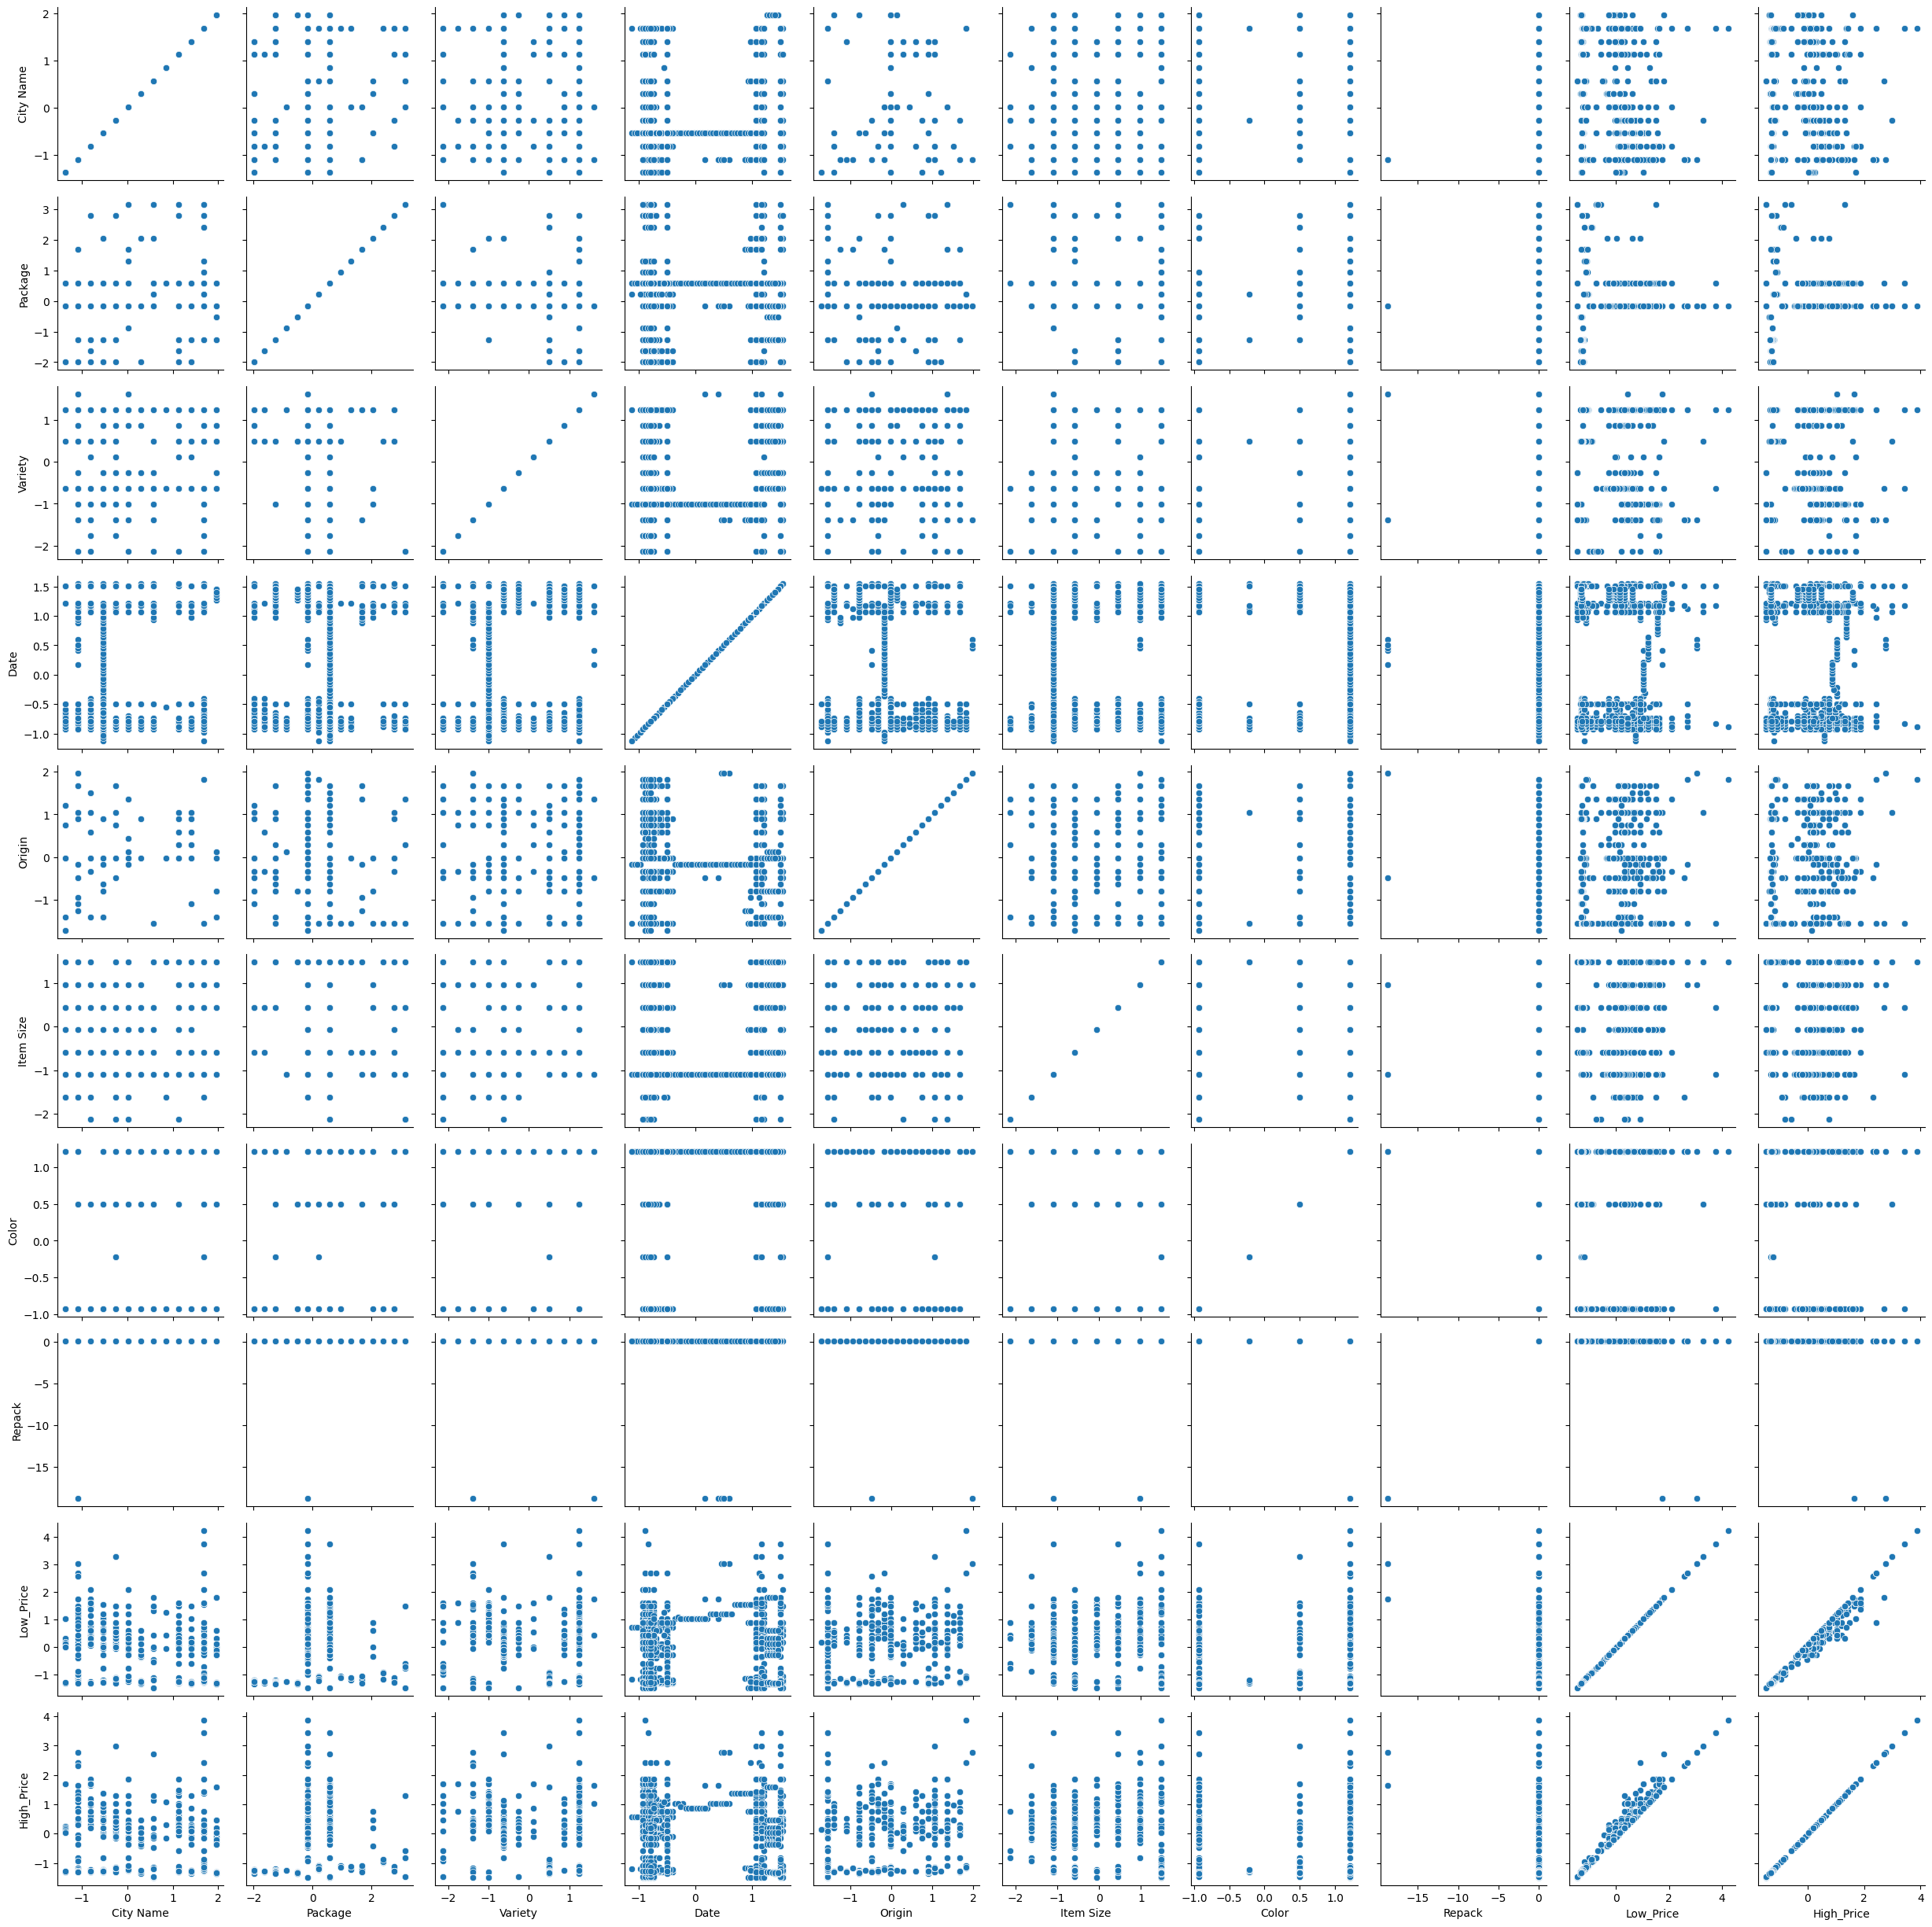

In [22]:
import seaborn as sns

g = sns.PairGrid(normalized_new_pumpkins)
g.map(sns.scatterplot)

By observing data side-by-side, you can see how the Color data relates to the other columns.

### Use a swarm plot
Since Color is a binary category (Orange or Not), it's called 'categorical data' and needs 'a more specialized approach to visualization'. There are other ways to visualize the relationship of this category with other variables.

You can visualize variables side-by-side with Seaborn plots.

Try a 'swarm' plot to show the distribution of values:

c:\Users\This Pc\Desktop\Arewa Datascience\ArewaDS-Machine-Learning-Assignments\ADS_env\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\This Pc\Desktop\Arewa Datascience\ArewaDS-Machine-Learning-Assignments\ADS_env\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\This Pc\Desktop\Arewa Datascience\ArewaDS-Machine-Learning-Assignments\ADS_env\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='Item Size'>

c:\Users\This Pc\Desktop\Arewa Datascience\ArewaDS-Machine-Learning-Assignments\ADS_env\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\This Pc\Desktop\Arewa Datascience\ArewaDS-Machine-Learning-Assignments\ADS_env\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\This Pc\Desktop\Arewa Datascience\ArewaDS-Machine-Learning-Assignments\ADS_env\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 84.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


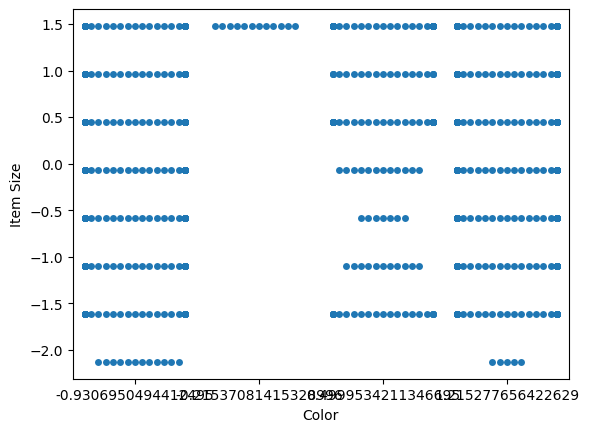

In [11]:
import seaborn as sns
sns.swarmplot(x="Color", y="Item Size", data=normalized_new_pumpkins)

### Violin plot
A 'violin' type plot is useful as you can easily visualize the way that data in the two categories is distributed. Violin plots don't work so well with smaller datasets as the distribution is displayed more 'smoothly'.

As parameters x=Color, kind="violin" and call catplot():

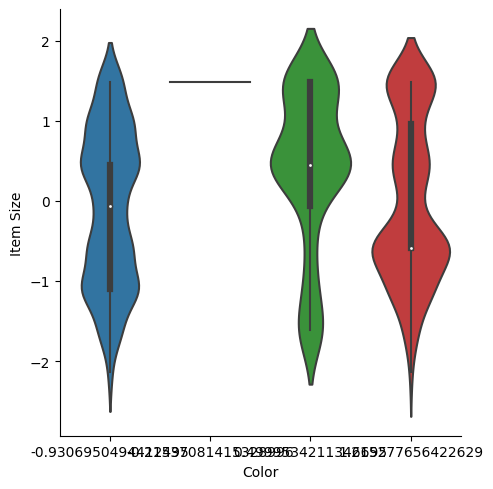

In [12]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=normalized_new_pumpkins)

## Build your model
Building a model to find these binary classification is surprisingly straightforward in Scikit-learn.

Let's select the variables you want to use in your classification model and split the training and test sets calling train_test_split():

In [15]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package', 'Date','Repack', 'Low_Price', 'High_Price']

X = normalized_new_pumpkins[Selected_features]
y = normalized_new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now we can train your model, by calling fit() with your training data, and print out its result:

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

ValueError: Unknown label type: 'continuous'